# Unsupervised Learning: Clustering & Dimensionality Reduction

**Author:** Ramin Yazdani

**Date:** December 2024

---

## Project Overview

This notebook demonstrates practical applications of unsupervised learning techniques, including:
- K-means clustering for pattern discovery
- Elbow method for optimal cluster selection
- Semi-supervised learning using clustering
- Principal Component Analysis (PCA) for dimensionality reduction


# Overview: Unsupervised Learning Techniques

# Introduction

This notebook demonstrates practical applications of clustering and dimensionality reduction techniques for machine learning workflows.

We explore two major areas:

1. **Part One**: Clustering techniques using K-means
2. **Part Two**: Dimensionality reduction using PCA

Both techniques are fundamental tools in unsupervised learning and data preprocessing.


# Part One: Clustering Analysis


In [1]:
## Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

random_state = 42

### Clustering the digits dataset

In this analysis, we work with the Digits dataset from scikit-learn, which consists of 8x8 pixel images of handwritten digits (0-9). 
Each datapoint is a 8x8 image of a digit.

    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============

### Load the dataset

In [2]:
from sklearn.datasets import load_digits

# Load the Iris dataset
data = load_digits()

# Extract features (X) and target labels (y)
X = data.data
y = data.target  # True labels (for information only, not used later on)

### Visualize some sample digits

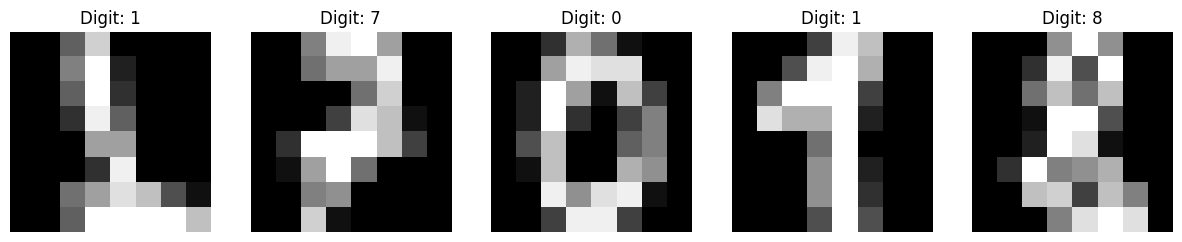

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    random_index = np.random.randint(
        0, len(X)
    )  # Choose a random index from the training set
    image = X[random_index].reshape(8, 8)  # Reshape the flat vector back to 8x8 image
    label = y[random_index]  # Get the corresponding label
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Digit: {label}")
    axes[i].axis("off")

plt.show()

### Finding the optimal $k$ in the K-means cluster model

We will try using the elbow heuristic ($k \in [1,30]$) to determine the number of clusters in this dataset.

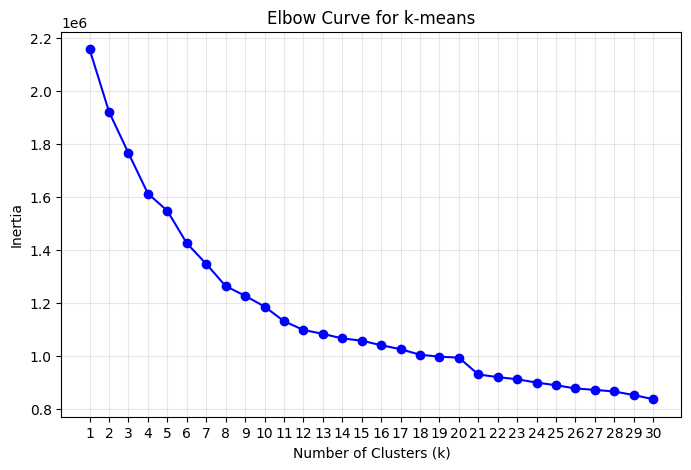

In [4]:
upper_bound_k = 30
inertia = []  # List to store inertia values for each k
# Calculate inertia for each number of clusters
for k in range(1, upper_bound_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Fit the model to the data
    inertia.append(kmeans.inertia_)  # Store the inertia

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, upper_bound_k + 1), inertia, marker="o", linestyle="-", color="b")
plt.title("Elbow Curve for k-means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, upper_bound_k + 1))
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Perform K-means clustering
from sklearn.cluster import KMeans

# Use k=50 based on elbow method analysis
k = 50  # Number of clusters (chosen based on elbow method)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_digits)
print(f"Clustered {len(X_digits)} samples into {k} clusters")

### Analysis Questions

1. **Do clustering algorithms (like $k$-means) take into account the number of classes or the value of the labels in a dataset, or do they work independently of this information?**

2. **Looking at the elbow curve, what would be a reasonable choice for the number of clusters $k$? Justify your answer.**
